In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
voids_SDSS = {}
for i in range(100):
    voids_SDSS[i] = pd.read_csv('../data/SDSS/web/void_random_{:03d}_mag_r_limited_xyz_mag_r_limited_xyz.csv'.format(i))

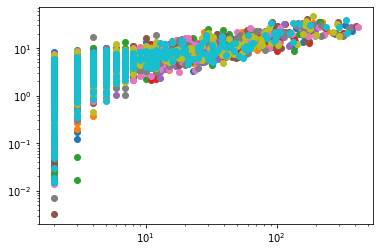

In [3]:
for i in range(10):
    plt.scatter(voids_SDSS[i]['N'], voids_SDSS[i]['SIGMA_R'])
    plt.loglog()

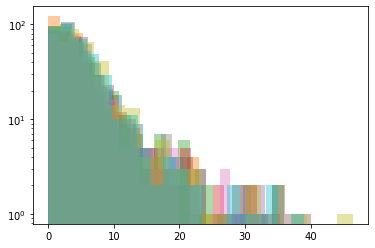

In [7]:
for i in range(10):
    ii = voids_SDSS[i]['N']>0
    _ = plt.hist(voids_SDSS[i]['SIGMA_R'][ii], log=True, bins=20, alpha=0.4)

In [8]:
eigen_values = {}

for v in range(100):
    n_points = len(voids_SDSS[v]['N'])
    eigen_1 = np.ones((n_points,3))
    for i in range(n_points):
        eigen_1[i] = np.fromstring(voids_SDSS[v]['EIGEN_1'][i][1:-1], sep=' ')
    
    eigen_values[v] = eigen_1

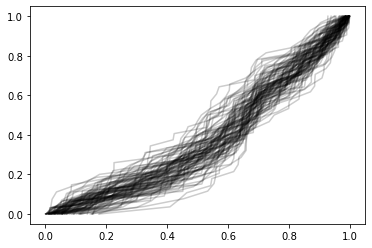

In [17]:
for v in range(100):
    ii = voids_SDSS[v]['N']>40
    component = eigen_values[v][ii,2]
    n = len(component)
    int_distro = np.linspace(0,1,n)
    x = np.sort(np.abs(component))
    plt.plot(x, int_distro, color='black', alpha=0.2)